A importação das bibliotecas juntamente com o conjunto de dados utilizado foi realizado da seguinte maneira:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

O conjunto de dados analisado foi encontrado através do repositório "COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University". A exibição dos dados que o Google utiliza também é baseada no mesmo dataset:

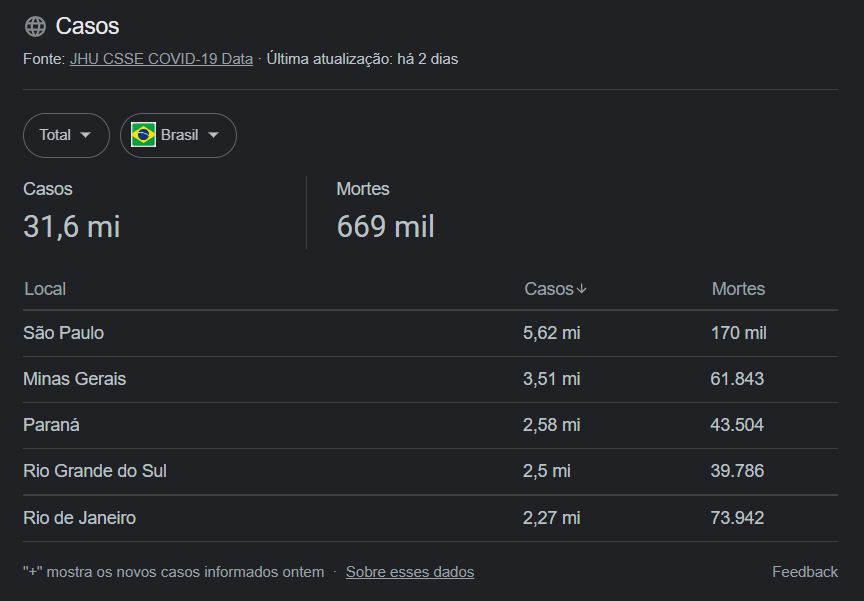

Dentro do repositório acima, podemos ver que a obtenção dos dados relacionados ao Brasil é realizada por Wesley Cota da Universidade federal de viçosa. O repositório dele pode ser encontrado a partir de : https://github.com/wcota/covid19br

In [2]:
!wget https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv   


--2022-06-20 18:03:05--  https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3612586 (3.4M) [text/plain]
Saving to: ‘cases-brazil-states.csv’

cases-brazil-states 100%[===================>]   3.44M  --.-KB/s    in 0.07s   

2022-06-20 18:03:05 (47.9 MB/s) - ‘cases-brazil-states.csv’ saved [3612586/3612586]



Podemos ver todas as colunas da base de dados a seguir:

In [3]:
data = pd.read_csv('./cases-brazil-states.csv',nrows = 0, sep=',')
data

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants


In [4]:
data.columns.values

array(['epi_week', 'date', 'country', 'state', 'city', 'newDeaths',
       'deaths', 'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'vaccinated',
       'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants'], dtype=object)

Podemos selecionar quais colunas queremos analisar:

In [5]:
cols = ['epi_week', 'date', 'country', 'state', 'city', 'newDeaths',
       'deaths', 'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'vaccinated',
       'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants']

In [6]:
cols = ['date','state','totalCases']

In [7]:
data = pd.read_csv('./cases-brazil-states.csv',usecols = ['state'], sep=',') 
data

,state
0,SP
1,TOTAL
2,SP
3,TOTAL
4,SP
...,...
23249,SC
23250,SE
23251,SP
23252,TO


In [8]:
data = pd.read_csv('./cases-brazil-states.csv',usecols = cols, sep=',')
data

,date,state,totalCases
0,2020-02-25,SP,1
1,2020-02-25,TOTAL,1
2,2020-02-26,SP,1
3,2020-02-26,TOTAL,1
4,2020-02-27,SP,1
...,...,...,...
23249,2022-06-20,SC,1767520
23250,2022-06-20,SE,327910
23251,2022-06-20,SP,5616538
23252,2022-06-20,TO,309197


É possível observar um ruído nos dados anteriores, há a ocorrência de diversas linhas com o Estado de "TOTAL", que representa  o total de casos por dia, podemos retirá-las para conseguir identificar apenas os estados que possuem casos registrados por dia

In [9]:
data = pd.read_csv('./cases-brazil-states.csv',usecols = cols, sep=',')
filtro = data['state'] != 'TOTAL'
dataFiltred = data[filtro]
dataFiltred

,date,state,totalCases
0,2020-02-25,SP,1
2,2020-02-26,SP,1
4,2020-02-27,SP,1
6,2020-02-28,SP,2
8,2020-02-29,SP,2
...,...,...,...
23248,2022-06-20,RS,2497375
23249,2022-06-20,SC,1767520
23250,2022-06-20,SE,327910
23251,2022-06-20,SP,5616538


Conseguimos identificar o tipo de cada campo

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23254 entries, 0 to 23253
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        23254 non-null  object
 1   state       23254 non-null  object
 2   totalCases  23254 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 545.1+ KB


In [11]:
data.dtypes

date          object
state         object
totalCases     int64
dtype: object

Conseguimos identificar todos os valores não preenchidos nas colunas

In [12]:
data.isna().sum()

date          0
state         0
totalCases    0
dtype: int64

In [13]:
data.describe()

,totalCases
count,2.325400e+04
mean,1.031676e+06
std,3.313058e+06
min,1.000000e+00
25%,1.011208e+05
50%,2.921920e+05
75%,6.528388e+05
max,3.161177e+07


In [14]:
data['state'].value_counts()

SP       847
TOTAL    847
RJ       838
BA       837
ES       837
DF       836
AL       835
MG       835
RS       833
GO       831
PE       831
PR       831
RN       831
SC       831
AM       830
MS       829
SE       829
CE       827
AC       826
PA       825
PB       825
TO       825
PI       824
AP       823
MA       823
MT       823
RO       823
RR       822
Name: state, dtype: int64